In [1]:
import pandas as pd

In [3]:
train = pd.read_csv('데이터/train.csv')

In [5]:
test = pd.read_csv('데이터/test.csv')

In [6]:
sample_submission = pd.read_csv('데이터/sample_submission.csv')

In [12]:
train.columns

Index(['user_id', 'subscription_duration', 'recent_login_time',
       'average_login_time', 'average_time_per_learning_session',
       'monthly_active_learning_days', 'total_completed_courses',
       'recent_learning_achievement', 'abandoned_learning_sessions',
       'community_engagement_level', 'preferred_difficulty_level',
       'subscription_type', 'customer_inquiry_history', 'payment_pattern',
       'target'],
      dtype='object')

In [17]:
train.dtypes

user_id                               object
subscription_duration                  int64
recent_login_time                      int64
average_login_time                   float64
average_time_per_learning_session    float64
monthly_active_learning_days           int64
total_completed_courses                int64
recent_learning_achievement          float64
abandoned_learning_sessions            int64
community_engagement_level             int64
preferred_difficulty_level            object
subscription_type                     object
customer_inquiry_history               int64
payment_pattern                        int64
target                                 int64
dtype: object

In [20]:
not_numeric = ['user_id', 'preferred_difficulty_level', 'subscription_type' ]
numeric_df = train.drop(columns=not_numeric)

In [21]:
corr = numeric_df.corr()
corr

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
subscription_duration,1.000000,0.014754,-0.000031,0.006324,0.002193,-0.001662,0.007875,0.014414,0.002114,-0.005174,-0.003704,-0.006710
recent_login_time,0.014754,1.000000,-0.006113,-0.004650,-0.015338,-0.000142,0.005768,-0.015882,-0.005486,0.011653,0.008737,-0.004184
average_login_time,-0.000031,-0.006113,1.000000,-0.007382,0.002294,-0.012416,-0.005967,0.013661,0.003129,0.009768,0.012508,-0.008527
average_time_per_learning_session,0.006324,-0.004650,-0.007382,1.000000,-0.001678,0.081332,-0.008231,-0.014488,0.086485,-0.001397,-0.002460,0.118261
monthly_active_learning_days,0.002193,-0.015338,0.002294,-0.001678,1.000000,0.004816,0.030110,-0.007512,0.000700,-0.016704,-0.003457,0.004876
total_completed_courses,-0.001662,-0.000142,-0.012416,0.081332,0.004816,1.000000,-0.002416,0.012322,0.266026,-0.014949,-0.013646,-0.004040
recent_learning_achievement,0.007875,0.005768,-0.005967,-0.008231,0.030110,-0.002416,1.000000,0.002115,-0.000810,0.005612,-0.003968,0.002294
abandoned_learning_sessions,0.014414,-0.015882,0.013661,-0.014488,-0.007512,0.012322,0.002115,1.000000,0.015877,-0.007322,0.010299,-0.019636
community_engagement_level,0.002114,-0.005486,0.003129,0.086485,0.000700,0.266026,-0.000810,0.015877,1.000000,0.005574,-0.015914,0.009641
customer_inquiry_history,-0.005174,0.011653,0.009768,-0.001397,-0.016704,-0.014949,0.005612,-0.007322,0.005574,1.000000,0.000128,0.000277


In [24]:
abs_corr = abs(corr['target'])
abs_corr = abs_corr.sort_values(ascending=False)
abs_corr

target                               1.000000
average_time_per_learning_session    0.118261
abandoned_learning_sessions          0.019636
community_engagement_level           0.009641
average_login_time                   0.008527
subscription_duration                0.006710
monthly_active_learning_days         0.004876
recent_login_time                    0.004184
total_completed_courses              0.004040
recent_learning_achievement          0.002294
payment_pattern                      0.001380
customer_inquiry_history             0.000277
Name: target, dtype: float64

<Axes: >

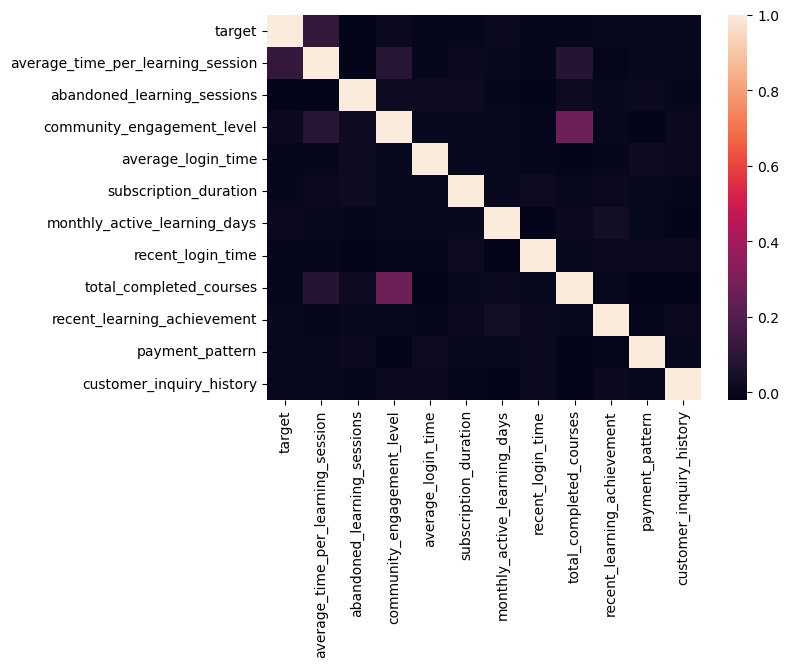

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.heatmap(numeric_df[abs_corr.index].corr())